In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

#Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [ ]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D, Flatten
from keras.utils.np_utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
#from keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading training set into dataframe
data = pd.read_csv('/content/drive/MyDrive/Dataset/NF-CSE-CIC-IDS2018.csv')

In [ ]:
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign
8392399,172.31.69.7,56407,172.31.0.2,53,17,0.000,72,0,1,0,0,0,0,Benign


In [ ]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [ ]:
data.Attack.value_counts()

Benign                      7373198
DDoS attacks-LOIC-HTTP       378199
FTP-BruteForce               193360
DoS attacks-Hulk             108136
DoS attacks-SlowHTTPTest     105550
SSH-Bruteforce                94237
Infilteration                 62072
DoS attacks-GoldenEye         32850
DoS attacks-Slowloris         22825
Bot                           15683
Brute Force -Web               2613
Brute Force -XSS               1745
DDOS attack-LOIC-UDP           1667
DDOS attack-HOIC                230
SQL Injection                    36
Name: Attack, dtype: int64

In [ ]:
def change_label(data):
  data.Attack.replace(['DDoS attacks-LOIC-HTTP', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-GoldenEye', 
                    'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'],'Dos',inplace=True)
  data.Attack.replace(['FTP-BruteForce', 'SSH-Bruteforce', 'Brute Force -Web'],'Probe',inplace=True)
  data.Attack.replace(['SQL Injection', 'Brute Force -XSS'],'U2R',inplace=True)
  data.Attack.replace(['Benign'],'Normal',inplace=True)
  data.Attack.replace(['Bot', 'Infilteration'],'R2L',inplace=True)
change_label(data)
data.Attack.value_counts()

Normal    7373198
Dos        649457
Probe      290210
R2L         77755
U2R          1781
Name: Attack, dtype: int64

In [ ]:
data.drop(data.loc[data['Attack']=='Normal'].index[:6900000], axis=0, inplace=True)
data.drop(data.loc[data['Attack']=='Dos'].index[:520000], axis=0, inplace=True)
data.drop(data.loc[data['Attack']=='Probe'].index[:100000], axis=0, inplace=True)
data.drop(data.loc[data['Attack']=='R2L'].index[:30000], axis=0, inplace=True)

In [ ]:
data.Attack.value_counts()

Normal    473198
Probe     190210
Dos       129457
R2L        47755
U2R         1781
Name: Attack, dtype: int64

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(", ".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
analyze(data)


842401 rows
** IPV4_SRC_ADDR:6891 (0%)
** L4_SRC_PORT:30729 (3%)
** IPV4_DST_ADDR:6806 (0%)
** L4_DST_PORT:30981 (3%)
** PROTOCOL:[6:92.56%, 17:7.16%, 1:0.27%, 2:0.0%, 58:0.0%, 0:0.0%]
** L7_PROTO:[0.0:97.61%, 5.126:0.47%, 91.126:0.38%, 91.178:0.22%, 79.178:0.19%, 91.125:0.13%, 7.0:0.12%, 5.178:0.11%, 41.0:0.07%, 91.0:0.07%, 5.119:0.07%, 5.24:0.06%, 91.119:0.05%, 127.0:0.05%, 91.22:0.04%, 7.126:0.04%, 5.239:0.03%, 91.12:0.03%, 5.233:0.03%, 5.2120000000000015:0.02%, 88.0:0.02%, 92.0:0.02%, 5.12:0.02%, 10.0:0.01%, 91.212:0.01%, 91.24:0.01%, 91.239:0.01%, 7.178:0.01%, 5.14:0.01%, 5.202999999999999:0.01%, 5.124:0.01%, 5.7:0.01%, 91.14:0.01%, 77.0:0.01%, 91.233:0.0%, 91.7:0.0%, 114.0:0.0%, 91.221:0.0%, 5.215:0.0%, 5.231:0.0%, 7.22:0.0%, 238.0:0.0%, 5.68:0.0%, 89.0:0.0%, 131.0:0.0%, 91.215:0.0%, 29.0:0.0%, 5.218999999999999:0.0%, 170.0:0.0%, 100.0:0.0%, 158.0:0.0%, 161.0:0.0%, 13.0:0.0%, 20.0:0.0%, 91.68:0.0%, 51.0:0.0%, 7.2189999999999985:0.0%, 4.0:0.0%, 7.125:0.0%, 1.0:0.0%, 244.0:0.0%, 7

In [ ]:
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
1917040,52.14.77.172,1024,172.31.69.28,500,17,79.178,528,0,1,0,0,0,1,U2R
1917052,13.58.42.57,1028,172.31.69.28,500,17,79.178,2640,0,5,0,0,4247475,1,U2R
1917058,13.58.42.57,1028,172.31.69.28,500,17,79.178,528,0,1,0,0,0,1,U2R
1917061,52.14.77.172,1024,172.31.69.28,500,17,79.178,2640,0,5,0,0,4247475,1,U2R
1917066,52.14.77.172,1024,172.31.69.28,500,17,79.178,528,0,1,0,0,0,1,U2R


In [ ]:
data.drop(columns=['Label'],inplace = True)

In [ ]:
data.rename(columns={"Attack": "label"},inplace = True)

In [ ]:
import ipaddress
from ipaddress import IPv4Address

In [ ]:
def IP_deal(df, len):
    arr1 = df.IPV4_SRC_ADDR; arr2 = df.IPV4_DST_ADDR
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    for i in range(len):
      try:
        arr1[i] = int(ipaddress.IPv4Address(arr1[i]))
        arr2[i] = int(ipaddress.IPv4Address(arr2[i]))
      except:
        print(arr1[i], i)
        print(arr2[i], i)
    df.IPV4_SRC_ADDR = arr1.reshape(len,1)
    df.IPV4_DST_ADDR = arr2.reshape(len,1)
    return df

data = IP_deal(data, data.shape[0])
data.head()

2887730457 342596
188. 342596


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
1917040,873352620,1024,2887730460,500,17,79.178,528,0,1,0,0,0,U2R
1917052,221915705,1028,2887730460,500,17,79.178,2640,0,5,0,0,4247475,U2R
1917058,221915705,1028,2887730460,500,17,79.178,528,0,1,0,0,0,U2R
1917061,873352620,1024,2887730460,500,17,79.178,2640,0,5,0,0,4247475,U2R
1917066,873352620,1024,2887730460,500,17,79.178,528,0,1,0,0,0,U2R


In [ ]:
# #Reset column names for training set
# train_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
# 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
# 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
# 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
# 'num_access_files', 'num_outbound_cmds', 'is_host_login',
# 'is_guest_login', 'count', 'srv_count', 'serror_rate',
# 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
# 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
# 'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
# 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
# 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
# 'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
# train_df.head()

In [ ]:
# #Reset column names for testing set
# test_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
# 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
# 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
# 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
# 'num_access_files', 'num_outbound_cmds', 'is_host_login',
# 'is_guest_login', 'count', 'srv_count', 'serror_rate',
# 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
# 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
# 'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
# 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
# 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
# 'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
# test_df.head()

In [ ]:
# #Dropping the last columns of training set
# train_df = train_df.drop('difficulty_level', 1) # we don't need it in this project
# train_df.shape
# #Dropping the last columns of testing set
# test_df = test_df.drop('difficulty_level', 1)
# test_df.shape

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_col = data.select_dtypes(include='number').columns

std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

data = normalization(data.copy(),numeric_col)
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
1917040,873352620,-0.963308,2887730460,-0.920539,3.563299,7.439758,-0.065542,-0.020646,-0.051918,-0.056186,-0.634481,-0.247238,U2R
1917052,221915705,-0.963156,2887730460,-0.920539,3.563299,7.439758,-0.060397,-0.020646,-0.051266,-0.056186,-0.634481,4.003551,U2R
1917058,221915705,-0.963156,2887730460,-0.920539,3.563299,7.439758,-0.065542,-0.020646,-0.051918,-0.056186,-0.634481,-0.247238,U2R
1917061,873352620,-0.963308,2887730460,-0.920539,3.563299,7.439758,-0.060397,-0.020646,-0.051266,-0.056186,-0.634481,4.003551,U2R
1917066,873352620,-0.963308,2887730460,-0.920539,3.563299,7.439758,-0.065542,-0.020646,-0.051918,-0.056186,-0.634481,-0.247238,U2R


In [ ]:
label = data.label
X_train, X_test, y_train, y_test = train_test_split(
     data, label, test_size=0.2, random_state=123,stratify= label)

In [ ]:
X_train

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
7694387,316396426,0.876649,2887730457,-0.937492,-0.270499,-0.120315,-0.064899,-0.020646,-0.051266,-0.056186,-0.126143,-0.247238,Dos
8168378,316529412,1.178776,2887730457,-0.939873,-0.270499,-0.120315,-0.066682,-0.020646,-0.051918,-0.056186,-0.600592,-0.247238,Probe
2200952,2887730449,0.986472,2887712770,-0.938581,3.563299,-0.120315,-0.066497,0.038146,-0.051755,0.397129,-0.634481,4.051030,R2L
4361491,90515499,1.317040,2887730440,-0.803928,-0.270499,-0.120315,-0.063233,0.295782,-0.050778,1.530418,3.127216,4.049391,R2L
7795570,96209689,0.921487,2887730450,-0.102529,-0.270499,-0.120315,-0.066731,-0.020646,-0.051918,-0.056186,-0.600592,-0.247238,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116640,2887730457,-1.001291,316529412,0.437456,-0.270499,-0.120315,-0.066731,-0.020646,-0.051918,-0.056186,-0.295589,-0.247238,Normal
7769227,2887730457,-0.999057,316253510,0.834634,-0.270499,-0.120315,-0.066682,-0.020646,-0.051918,-0.056186,-0.329478,-0.247238,Normal
7777331,316253510,0.765462,2887730457,-0.937492,-0.270499,-0.120315,-0.066015,-0.020646,-0.051755,-0.056186,-0.227811,-0.247238,Dos
8106451,316529412,0.974808,2887730457,-0.939873,-0.270499,-0.120315,-0.066682,-0.020646,-0.051918,-0.056186,-0.600592,-0.247238,Probe


In [ ]:
cols=['TCP_FLAGS','L7_PROTO','PROTOCOL']

In [ ]:
# #One-hot encoding
# def one_hot(df, cols):
#     """
#     param df pandas DataFrame
#     param cols a list of columns to encode
#     return a DataFrame with one-hot encoding
#     """
#     for each in cols:
#         dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
#         df = pd.concat([df, dummies], axis=1)
#         df = df.drop(each, 1)
#     return df

In [ ]:
# #Applying one hot encoding to df's
# train_df_1 = one_hot(X_train,cols)
# test_df_1 = one_hot(X_test,cols)

In [ ]:
# #Function to min-max normalize
# def normalize(df, cols):
#     """
#     param df pandas DataFrame
#     param cols a list of columns to encode
#     return a DataFrame with normalized specified features
#     """
#     result = df.copy() # do not touch the original df
#     for feature_name in cols:
#         max_value = df[feature_name].max()
#         min_value = df[feature_name].min()
#         if max_value > min_value:
#             result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#     return result

In [ ]:
# #Dropping subclass column for training  and testing set
# tmp = train_df_1.pop('subclass')
# tmp1 = test_df_1.pop('subclass')

In [ ]:
# #Normalizing training set
# train_df = normalize(X_train,X_train.columns)
# train_df

In [ ]:
# #Normalizing testing set
# test_df_2 = normalize(test_df_1,test_df_1.columns)
# test_df_2

In [ ]:
# #Fixing labels for training set
# classlist_train = []
# check1_train = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
# check2_train = ("ipsweep","mscan","nmap","portsweep","saint","satan")
# check3_train = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
# check4_train = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

# DoSCount_train=0
# ProbeCount_train=0
# U2RCount_train=0
# R2LCount_train=0
# NormalCount_train=0

# for item in tmp:
#     if item in check1_train:
#         classlist_train.append("DoS")
#         DoSCount_train=DoSCount_train+1
#     elif item in check2_train:
#         classlist_train.append("Probe")
#         ProbeCount_train=ProbeCount_train+1
#     elif item in check3_train:
#         classlist_train.append("U2R")
#         U2RCount_train=U2RCount_train+1
#     elif item in check4_train:
#         classlist_train.append("R2L")
#         R2LCount_train=R2LCount_train+1
#     else:
#         classlist_train.append("Normal")
#         NormalCount_train=NormalCount_train+1   

In [ ]:
# print(DoSCount_train)
# print( NormalCount_train)
# print(ProbeCount_train)
# print(R2LCount_train)
# print(U2RCount_train)

In [ ]:
# #Fixing labels for testing set
# classlist_test = []
# check1_test = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
# check2_test = ("ipsweep","mscan","nmap","portsweep","saint","satan")
# check3_test = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
# check4_test = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

# DoSCount_test=0
# ProbeCount_test=0
# U2RCount_test=0
# R2LCount_test=0
# NormalCount_test=0

# for item in tmp1:
#     if item in check1_test:
#         classlist_test.append("DoS")
#         DoSCount_test=DoSCount_test+1
#     elif item in check2_test:
#         classlist_test.append("Probe")
#         ProbeCount_test=ProbeCount_test+1
#     elif item in check3_test:
#         classlist_test.append("U2R")
#         U2RCount_test=U2RCount_test+1
#     elif item in check4_test:
#         classlist_test.append("R2L")
#         R2LCount_test=R2LCount_test+1
#     else:
#         classlist_test.append("Normal")
#         NormalCount_test=NormalCount_test+1   

In [ ]:
# print(DoSCount_test)
# print( NormalCount_test)
# print(ProbeCount_test)
# print(R2LCount_test)
# print(U2RCount_test)

In [ ]:
#Appending class column to training set
# train_df_2["Class"] = classlist_train
# train_df_2

In [ ]:
# #Appending class column to testing set
# test_df_2["Class"] = classlist_test
# test_df_2

In [ ]:
# y_train = train_df_2['Class']
# y_test = test_df_2['Class']

In [ ]:
# X_train = train_df_2.drop('Class', 1)
# X_test = test_df_2.drop('Class', 1)
# X_train

In [ ]:
cnn_lstm = Sequential()
cnn_lstm.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(12, 1)))
cnn_lstm.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn_lstm.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(LSTM(64, return_sequences=True))  
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(LSTM(64, return_sequences=False))
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(Dense(48, activation='relu'))
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(Dense(48, activation='relu'))
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(Dense(5, activation='softmax'))

In [ ]:
# define optimizer and objective, compile cnn_lstm
cnn_lstm.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [ ]:
cnn_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 12, 64)            256       
                                                                 
 conv1d_5 (Conv1D)           (None, 12, 64)            12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 6, 128)            24704     
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 128)            49280     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3, 128)           0         
 1D)                                                  

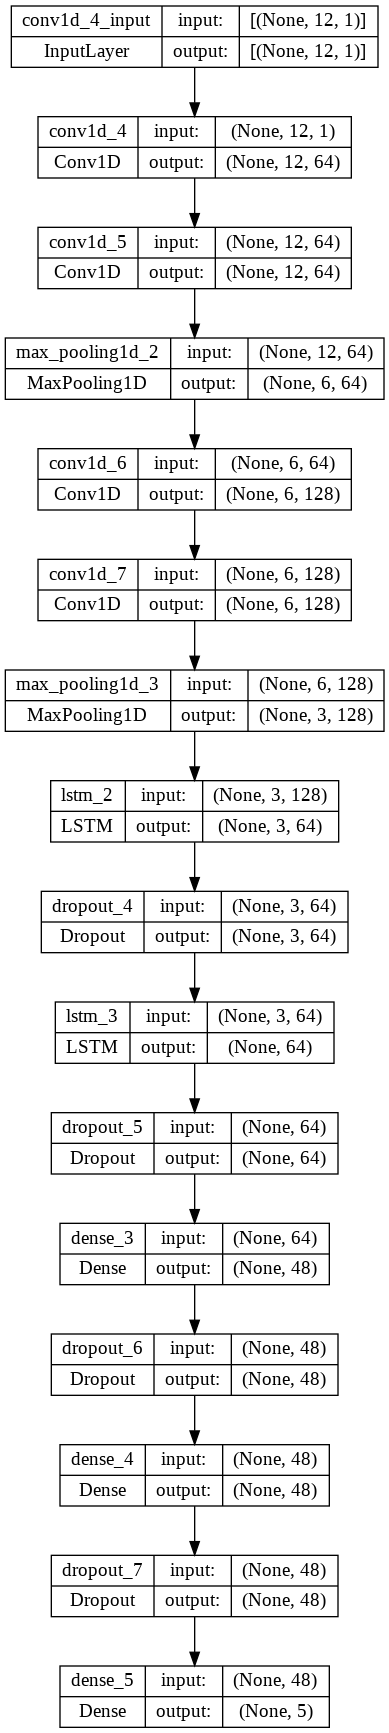

In [ ]:
# representation of model layers
from tensorflow.keras.utils import plot_model
plot_model(cnn_lstm, show_shapes=True, to_file='model_cnn_lstm.png')

In [ ]:
# #Split data: 80% training and 20% testing 
# train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 101)

In [ ]:
X_train.drop(columns=['label'],inplace = True)

In [ ]:
X_test.drop(columns=['label'],inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [ ]:
# x_columns_train = X_train.columns.value
# x_train_array = X_train[x_columns_train].values
x_train_1=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
dummies = pd.get_dummies(y_train) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y_train_1 = dummies.values
    
# x_columns_test = X_test.columns.drop()
# x_test_array = X_test[x_columns_test].values
x_test_1=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
dummies_test = pd.get_dummies(y_test) # Classification
outcomes_test = dummies_test.columns
num_classes = len(outcomes_test)
y_test_1 = dummies_test.values  

In [ ]:
history= cnn_lstm.fit(x_train_1, y_train_1,validation_data=(x_test_1,y_test_1), batch_size=10000, epochs=10) 

Epoch 1/10
68/68 [==============================] - 125s 2s/step - loss: 0.9978 - accuracy: 0.6342 - val_loss: 0.3994 - val_accuracy: 0.7861
Epoch 2/10
68/68 [==============================] - 118s 2s/step - loss: 0.2850 - accuracy: 0.8752 - val_loss: 0.2451 - val_accuracy: 0.9060
Epoch 3/10
68/68 [==============================] - 118s 2s/step - loss: 0.2244 - accuracy: 0.9006 - val_loss: 0.2631 - val_accuracy: 0.9038
Epoch 4/10
68/68 [==============================] - 117s 2s/step - loss: 0.2129 - accuracy: 0.8991 - val_loss: 0.1805 - val_accuracy: 0.9070
Epoch 5/10
68/68 [==============================] - 120s 2s/step - loss: 0.2080 - accuracy: 0.9024 - val_loss: 0.2257 - val_accuracy: 0.8315
Epoch 6/10
68/68 [==============================] - 120s 2s/step - loss: 0.1877 - accuracy: 0.8956 - val_loss: 0.1685 - val_accuracy: 0.9107
Epoch 7/10
68/68 [==============================] - 119s 2s/step - loss: 0.1820 - accuracy: 0.9085 - val_loss: 0.2144 - val_accuracy: 0.9012
Epoch 8/10
68

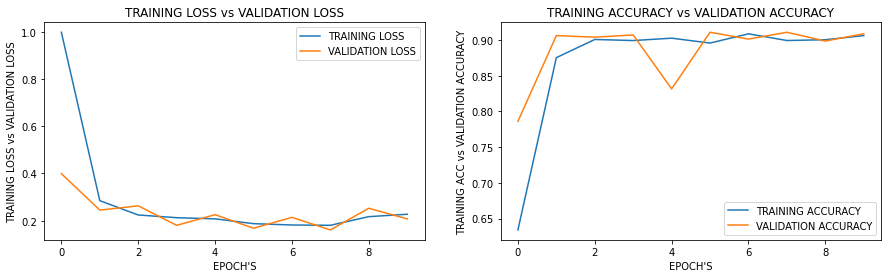

In [ ]:
    #use matplitlib to draw the plots of last epoch
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label = "TRAINING LOSS")
    plt.plot(history.history['val_loss'], label = "VALIDATION LOSS")
    plt.title("TRAINING LOSS vs VALIDATION LOSS")
    plt.xlabel("EPOCH'S")
    plt.ylabel("TRAINING LOSS vs VALIDATION LOSS")
    plt.legend(loc = "best")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label = "TRAINING ACCURACY")
    plt.plot(history.history['val_accuracy'], label = "VALIDATION ACCURACY")
    plt.title("TRAINING ACCURACY vs VALIDATION ACCURACY")
    plt.xlabel("EPOCH'S")
    plt.ylabel("TRAINING ACC vs VALIDATION ACCURACY")
    plt.legend(loc = "best")

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

pred1 = cnn_lstm.predict(x_test_1)
pred2 = np.argmax(pred1,axis=1)
pred = le.fit_transform(pred2)
#pred = le.inverse_transform(pred)
y_eval = np.argmax(y_test_1,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}%".format(score*100)) 

5266/5266 [==============================] - 35s 6ms/step
Validation score: 90.8636582166535%


In [ ]:
acc = accuracy_score(y_eval, pred)
print("accuracy : ",acc)
recall = recall_score(y_eval, pred, average = "micro")
print("recall : ",recall)
precision = precision_score(y_eval, pred, average = "micro")
print("precision : ",precision)
f1_scr = f1_score(y_eval, pred, average = "micro")
print("f1_score : ",f1_scr)

NameError: ignored

In [ ]:
# 0:Dos  1:normal  2:Probe  3:R2L  4:U2L          
print("####   0:Dos  1:normal  2:Probe  3:R2L  4:U2L  ###\n\n")
print(classification_report(pred, y_eval))

####   0:Dos  1:normal  2:Probe  3:R2L  4:U2L  ###


              precision    recall  f1-score   support

           0       0.44      0.97      0.61     11850
           1       0.99      1.00      1.00     93946
           2       1.00      0.72      0.84     52790
           3       1.00      0.98      0.99      9712
           4       0.48      0.93      0.63       183

    accuracy                           0.91    168481
   macro avg       0.78      0.92      0.81    168481
weighted avg       0.96      0.91      0.92    168481



[[11469     0 14387    23    13]
 [  381 93898   361     0     0]
 [    0     0 38042     0     0]
 [    0    42     0  9509     0]
 [    0     6     0   180   170]] 



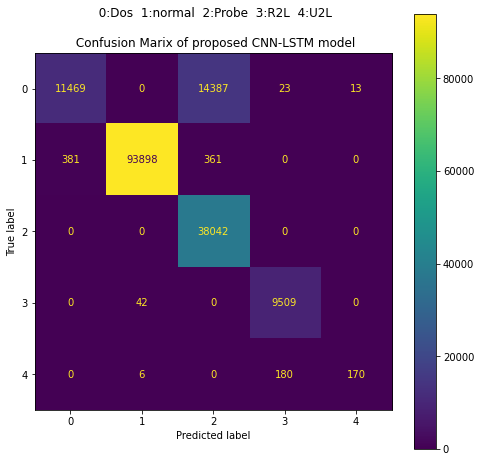

In [ ]:
#confusion matrix 
#import seaborn as sns
#%matplotlib inline

cm = confusion_matrix(y_eval, pred2)
print(cm,'\n')
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.title('  0:Dos  1:normal  2:Probe  3:R2L  4:U2L \n\n Confusion Marix of proposed CNN-LSTM model')
plt.show()

n_classes: 5


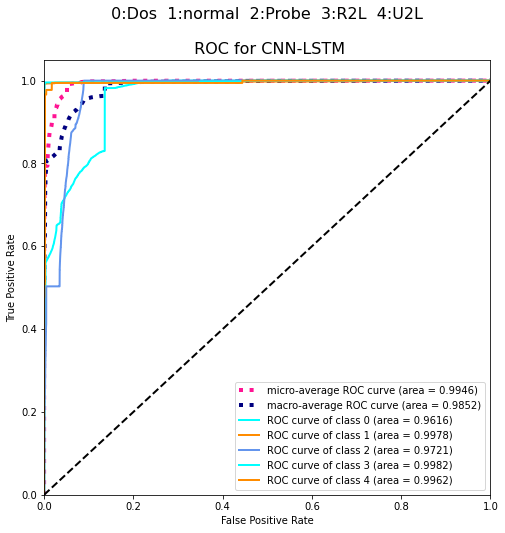

In [ ]:
# ROC curve：

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)

        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
    print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        
        
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        
        
        
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

#y_true_2= le.transform(np.argmax(y_test_1,axis=1))
RoC_Curve(pred1, y_eval, le.classes_, title=' 0:Dos  1:normal  2:Probe  3:R2L  4:U2L \n\n ROC for CNN-LSTM')

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("TP = ", TP)
print("TN = ", TN)
print("FP = ", FP)
print("FN = ", FN)
print("\n")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("TPR = ", TPR , "  True positive rate, Sensitivity, hit rate, or recall")
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("FPR = ", FPR, "  False positive rate or fall out")
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("TNR = ", TNR, "  True negative rate or specificity")
# False negative rate
FNR = FN/(TP+FN)
print("FNR = ", FNR, "  False negative rate")
print("\n")

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("PPV = ", PPV, "  Positive predictive value or precision")
# Negative predictive value
NPV = TN/(TN+FN)
print("NPV = ", NPV, "  Negative predictive value")
# False discovery rate
FDR = FP/(TP+FP)
print("FDR = ", FDR, "  False discovery rate")
print("\n")

# Overall accuracy
#ACC = (TP+TN)/(TP+FP+FN+TN)
#print("ACC = ", ACC)

TP =  [11469. 93898. 38042.  9509.   170.]
TN =  [142208.  73793. 115691. 158727. 168112.]
FP =  [3.8100e+02 4.8000e+01 1.4748e+04 2.0300e+02 1.3000e+01]
FN =  [14423.   742.     0.    42.   186.]


TPR =  [0.44295535 0.99215976 1.         0.99560255 0.47752809]   True positive rate, Sensitivity, hit rate, or recall
FPR =  [2.67201537e-03 6.50045368e-04 1.13064344e-01 1.27729189e-03
 7.73234201e-05]   False positive rate or fall out
TNR =  [0.99732798 0.99934995 0.88693566 0.99872271 0.99992268]   True negative rate or specificity
FNR =  [0.55704465 0.00784024 0.         0.00439745 0.52247191]   False negative rate


PPV =  [0.9678481  0.99948907 0.72062891 0.97909802 0.92896175]   Positive predictive value or precision
NPV =  [0.90791733 0.99004495 1.         0.99973546 0.99889482]   Negative predictive value
FDR =  [0.0321519  0.00051093 0.27937109 0.02090198 0.07103825]   False discovery rate


